<a href="https://colab.research.google.com/github/sr-DCBP/Data-Science/blob/main/Coding%20Task2%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Task 2 Sabela Reuge

Part 1

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm



In [60]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data-science/Data Task2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
!pip install pillow_heif 

In [78]:
#Save files
from PIL import Image
import pillow_heif

for i in range(79,94):
  url_pre  = '/content/drive/MyDrive/Data-science/Data Task2'
  url_name = 'IMG_53'+ str(i) #make the name of the files IMG_5379 to IMG_5393
  print(url_name)
  heif_file = pillow_heif.read(url_pre + '/' + url_name + '.HEIC') #to read the heif file (iphone file)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_name = url_name.split('.')[0]+'.png'  #call file png
  image.save(url_pre+url_name, format="png")
  print(url_name)

IMG_5379
IMG_5379.png
IMG_5380
IMG_5380.png
IMG_5381
IMG_5381.png
IMG_5382
IMG_5382.png
IMG_5383
IMG_5383.png
IMG_5384
IMG_5384.png
IMG_5385
IMG_5385.png
IMG_5386
IMG_5386.png
IMG_5387
IMG_5387.png
IMG_5388
IMG_5388.png
IMG_5389
IMG_5389.png
IMG_5390
IMG_5390.png
IMG_5391
IMG_5391.png
IMG_5392
IMG_5392.png
IMG_5393
IMG_5393.png


Part 2

Exception ignored in: <function LibHeifCtx.__del__ at 0x7eff8513a290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pillow_heif/_libheif_ctx.py", line 51, in __del__
    if self._fp_close_after and self.fp and hasattr(self.fp, "close"):
AttributeError: 'LibHeifCtx' object has no attribute 'fp'
Exception ignored in: <function LibHeifCtx.__del__ at 0x7eff8513a290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pillow_heif/_libheif_ctx.py", line 51, in __del__
    if self._fp_close_after and self.fp and hasattr(self.fp, "close"):
AttributeError: 'LibHeifCtx' object has no attribute 'fp'
Exception ignored in: <function LibHeifCtx.__del__ at 0x7eff8513a290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pillow_heif/_libheif_ctx.py", line 51, in __del__
    if self._fp_close_after and self.fp and hasattr(self.fp, "close"):
AttributeError: 'LibHeifCtx' object has no attribute 'fp'


(2016, 3024)


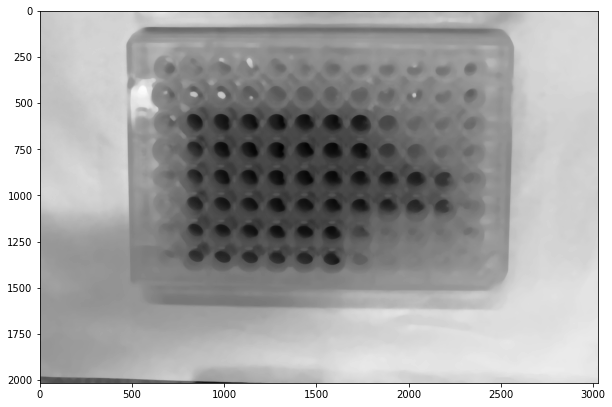

In [74]:
#Modify the image
#make image gray
image = imageRGB[:,:,2] #i take the third alyer -> 2 and all the rows and all the columns -> gray scale
#plot image
plt.figure(figsize=(10,10))
plt.imshow(image,cmap = 'gray') #dont need all the colors

#Crop the image
image = image[image.shape[0]//2:image.shape[0],:] #indexing take rows in second half of the table
print(image.shape)
plt.imshow(image, cmap ='gray')


#filter out the reflections
image_mean = skf.median(image,selem=skm.disk(20)) #disk is 20 pixels around the pixel to average; faster if do it with GPU (maybe) -> Laufzeit -> Laufzeittyp ändern
plt.imshow(image_mean, cmap ='gray')
plt.show()

Part 3

In [76]:
#Make a threshold

threshold_manual = 65
image_threshold = image_mean<threshold_manual #make new image 

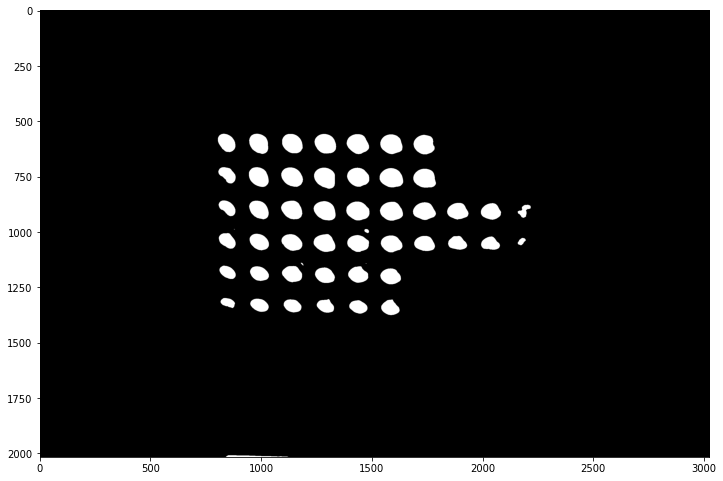


Dots number: 38


In [77]:
import cv2

# threshold
th, threshed = cv2.threshold(image_mean, 65, 50,
		cv2.THRESH_BINARY|cv2.THRESH_OTSU)
plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

# findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST,
					cv2.CHAIN_APPROX_SIMPLE)[-2]

# filter by area
s1 = 0
s2 = 100000000
xcnts = []

for cnt in cnts:
	if s1<cv2.contourArea(cnt) <s2:
		xcnts.append(cnt)

# printing output
print("\nDots number: {}".format(len(xcnts)))